### Project for Delivery Duration Prediction

##### Project: Build a Linear Regression model to predict the estimated time taken for a delivery.

### Step 1 : Data Gathering
    We have imported the dataset.

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
path = r"E:\data science\datasets\ML\Dataset for project.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,22:24:17,23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,21:49:25,22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,20:39:28,21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,21:21:45,22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,02:40:36,03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


### Step 2 : Basic Data Wuality Checks
    We will check data types and missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [5]:
df.shape

(197428, 16)

In [6]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [7]:
# We will check missing values
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

##### As we can see there is lots of missing data. If we try to drop all the null data we will significantly reduce the size of the dataset.Instead of this we need to do something.

#### We will handle missng data and fill missing vlaues.
    There is following columns have missing data & we will fill this with following terms:
1.  market_id: It is numeric type so we can filled with most frequent i.e Mode.
2.  store_primary_category : It is categrical type. We wil fill this with 'No_country'
3.  order_protocol : It is numeric type. Here also we can use most frequent value i.e Mode.
4.  total_onshift_dashers : It is numeric type. we can fill this with zero or 0 because there is noone active.
5.  total_busy_dashers : It is numeric type. we can fill this with zero or 0 because there is noone active.
6.  total_outstanding_orders : It is numeric type. we can fill this with zero or 0 because there is noone active.
7.  estimated_store_to_consumer_driving_duration : It is numeric type. We will fill this with 'median'.

In [8]:
# Fill numeric columns:
df['market_id'].fillna(df['market_id'].mode()[0],inplace=True)
df['order_protocol'].fillna(df['order_protocol'].mode()[0],inplace=True)
df['total_busy_dashers'].fillna(df['total_busy_dashers'].median(),inplace=True)
df['total_onshift_dashers'].fillna(df['total_onshift_dashers'].median(),inplace=True)
df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median(),inplace=True)
df['estimated_store_to_consumer_driving_duration'].fillna(df['estimated_store_to_consumer_driving_duration'].median(),inplace=True)

# Fill categorical columns:
df['store_primary_category'].fillna('No_country',inplace=True)


In [9]:
# We will drop the rows with missing delivery times
df.dropna(subset=['actual_delivery_time'],inplace=True)

In [10]:
# verifying the is any missing data still available or not:
print("Missing values after cleaning:\n",df.isnull().sum())

Missing values after cleaning:
 market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64


In [11]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000,197421.000000
mean,2.973807,3530.581397,2.872871,3.196367,2682.326379,2.670780,686.224596,1159.590444,44.163797,41.101327,56.643690,308.560244,545.353473
std,1.522628,2053.493429,1.505892,2.666552,1823.106256,1.630261,522.044061,558.416236,33.142936,30.866192,50.661857,90.139725,219.061573
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,19.000000,251.000000,383.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


### Step 3 : Removing duplicates if any

In [12]:
df.duplicated().sum()

np.int64(0)

#### There is no any duplicated values.

### Step 4 : Seperate X and Y features

We will predict time_taken_for_delivery = actual_delivery_time - created_atf

In [13]:
# We will calculate the target variable
# Convert time columns to datetime
df['created_at'] = pd.to_datetime(df['created_at'],errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'],errors='coerce')

In [14]:
# compute duration in minutes
df['time_taken_for_delivery'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

In [15]:
# Drop missing duration
df = df.dropna(subset=['time_taken_for_delivery'])

In [16]:
X = df.drop(['actual_delivery_time','created_at','time_taken_for_delivery'],axis=1)
Y = df[['time_taken_for_delivery']]

In [17]:
X.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,5477,No_country,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,5477,No_country,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,5477,No_country,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [18]:
Y.head()

,time_taken_for_delivery
0,3779.0
1,4024.0
2,1781.0
3,3075.0
4,2390.0


### Step 5 : Create Data pipelines => Cleaning, Preprocessing

In [19]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [21]:
X_pre = pre.fit_transform(Y)
X_pre.head()

,time_taken_for_delivery
0,0.238313
1,0.254872
2,0.103271
3,0.190730
4,0.144432


### Step 6 : EDA - Exploratory Data Analysis- Descriptive/statiscal Analysis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Delivery Duration')

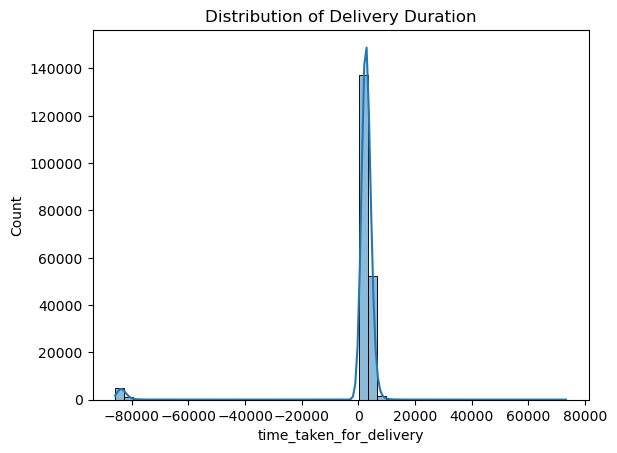

In [23]:
sns.histplot(df['time_taken_for_delivery'],bins=50,kde=True)
plt.title("Distribution of Delivery Duration")

Text(0.5, 1.0, 'Subtotal vs time_taken_for_delivery')

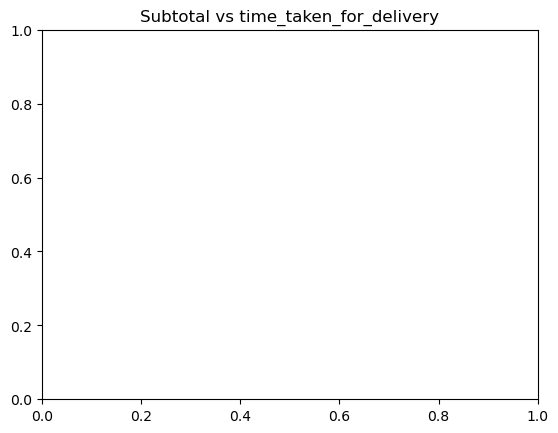

In [25]:
sns.scatterplot(X=df['subtotal'], Y=df['time_taken_for_delivery'])
plt.title("Subtotal vs time_taken_for_delivery")

### Train Test Split - Splitting of data into training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.7,test_size=0.3,random_state=21)

In [29]:
xtrain.head()

,time_taken_for_delivery
98686,0.174982
117012,0.360243
177721,0.186337
2205,0.156598
4743,0.122533


In [30]:
xtrain.index

Index([ 98686, 117012, 177721,   2205,   4743, 195223, 154343, 165606, 159819,
         9849,
       ...
       132722, 110797,  64243, 176745,  42106,  63858,  81971, 140040,  70865,
        80844],
      dtype='int64', length=138194)

In [31]:
xtest.head()

,time_taken_for_delivery
265,0.073329
93653,0.123682
155571,-5.598244
104281,0.193434
27773,0.176266


In [32]:
ytrain.head()

,time_taken_for_delivery
98686,2842.0
117012,5583.0
177721,3010.0
2205,2570.0
4743,2066.0


In [33]:
ytest.head()

,time_taken_for_delivery
265,1338.0
93653,2083.0
155571,-82575.0
104281,3115.0
27773,2861.0
